## Libraries Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Introduction
we will address the subject of gemstones, specifically the stone of cubic zirconia

## The first step: EDA


## Load Data


In [2]:
#reading the data
df= pd.read_csv('cubic_zirconia.csv',index_col=0) 

## Data Cleaning

In [3]:
#show first 5 row
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
#show number of rows and columns
print("DataSet dimension     :",df.shape)

DataSet dimension     : (26967, 10)


In [5]:
#summary statistic 
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [6]:
#show information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
#show all null value in columns
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
#know the type of data
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [9]:
# show ten row randomly
df.sample(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
26802,0.26,Ideal,E,VVS2,62.0,56.0,4.13,4.10,2.55,769
22054,0.53,Ideal,E,VS2,61.0,57.0,5.26,5.23,3.20,1727
10215,1.00,Premium,H,SI2,59.6,62.0,6.52,6.41,3.85,3640
14930,1.00,Premium,D,SI2,61.6,58.0,6.45,6.37,3.95,4626
6952,0.24,Ideal,F,IF,61.6,57.0,3.97,4.00,2.45,678
11907,0.75,Very Good,H,SI2,60.4,60.0,5.89,5.93,3.57,2106
19130,0.28,Ideal,E,VVS2,60.3,57.0,4.21,4.25,2.55,646
12196,0.70,Ideal,H,SI1,61.8,53.0,5.71,5.74,3.54,2499
24030,0.32,Ideal,F,VS2,62.1,57.0,4.35,4.38,2.71,645
13071,0.70,Premium,E,VS2,62.4,61.0,5.66,5.63,3.52,2818


In [10]:
#drop depth column
df.drop(['depth'], axis=1, inplace=True)

In [11]:
#drop table column
df.drop(['table'], axis=1, inplace=True)

In [74]:
# rename columns
df=df.rename(columns={'carat': 'Carat', 'cut': 'Cut', 'color': 'Color',
                                  'clarity': 'Clarity', 'price': 'Price',
                                  'x': 'Length', 'y': 'Width', 'z': 'Height'})

In [75]:
#show first 5 row
df.head()

,Carat,Cut,Color,Clarity,Length,Width,Height,Price
1,0.30,Ideal,E,SI1,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,4.35,4.43,2.65,779


## Note that we have Five columns containing outlier 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


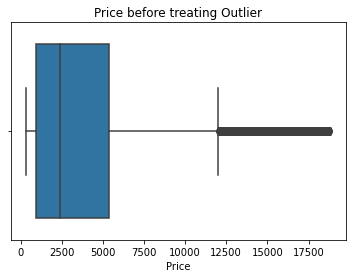

In [14]:
#Show outlier in Price column
sns.boxplot(df['Price']).set_title("Price before treating Outlier");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


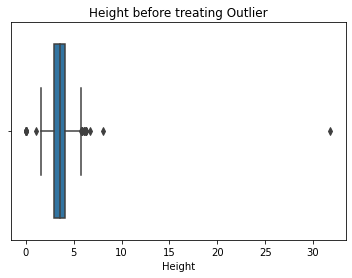

In [15]:
#Show outlier in Height column
sns.boxplot(df['Height']).set_title("Height before treating Outlier");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


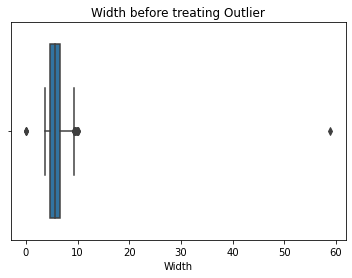

In [16]:
#Show outlier in Width column
sns.boxplot(df['Width']).set_title("Width before treating Outlier");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


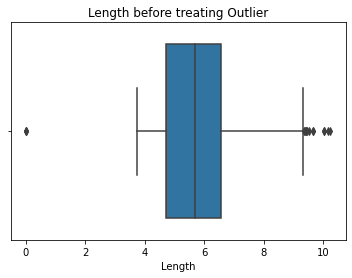

In [17]:
#Show outlier in Length column
sns.boxplot(df['Length']).set_title("Length before treating Outlier");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


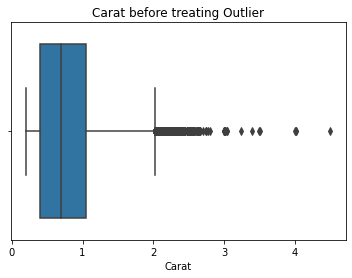

In [18]:
#Show outlier in Carat column
sns.boxplot(df['Carat']).set_title("Carat before treating Outlier");

In [19]:
# replace all 0 value to null value 
df = df.replace(0,np.nan)

In [20]:
#show information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Carat    26967 non-null  float64
 1   Cut      26967 non-null  object 
 2   Color    26967 non-null  object 
 3   Clarity  26967 non-null  object 
 4   Length   26964 non-null  float64
 5   Width    26964 non-null  float64
 6   Height   26958 non-null  float64
 7   Price    26967 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [21]:
#show all null value in columns
df.isnull().sum()

Carat      0
Cut        0
Color      0
Clarity    0
Length     3
Width      3
Height     9
Price      0
dtype: int64

In [22]:
# Show just cloumns names
df.columns

Index(['Carat', 'Cut', 'Color', 'Clarity', 'Length', 'Width', 'Height',
       'Price'],
      dtype='object')

In [23]:
#put in all null value in length column mean 
df['Length'].fillna(df['Length'].mean(),inplace=True)

In [24]:
#put in all null value in width column mean 
df['Width'].fillna(df['Width'].mean(),inplace=True)

In [25]:
#put in all null value in Height column mean 
df['Height'].fillna(df['Height'].mean(),inplace=True)

In [26]:
#show all null value in columns
df.isnull().sum()

Carat      0
Cut        0
Color      0
Clarity    0
Length     0
Width      0
Height     0
Price      0
dtype: int64

In [27]:
#show information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Carat    26967 non-null  float64
 1   Cut      26967 non-null  object 
 2   Color    26967 non-null  object 
 3   Clarity  26967 non-null  object 
 4   Length   26967 non-null  float64
 5   Width    26967 non-null  float64
 6   Height   26967 non-null  float64
 7   Price    26967 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [28]:
#summary statistic 
df.describe()

,Carat,Length,Width,Height,Price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,5.730491,5.734207,3.539238,3939.518115
std,0.477745,1.126897,1.164488,0.717718,4024.864666
min,0.200000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,10.230000,58.900000,31.800000,18818.000000


## Outlier problem is solved

In [29]:
# This statement solved outlier problem in Height column
index = df[(df['Height'] >= 5)|(df['Height'] <= 2)].index 
df.drop(index, inplace=True) 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


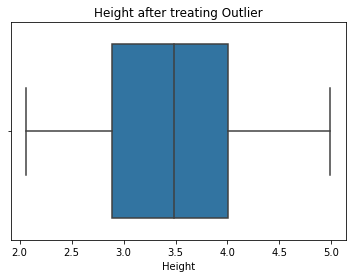

In [30]:
#Show outlier in Height column
sns.boxplot(df["Height"]).set_title("Height after treating Outlier");# s

In [31]:
# This statement solved outlier problem in Width column
index = df[(df['Width'] >= 7)|(df['Width'] <= 2)].index
df.drop(index, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


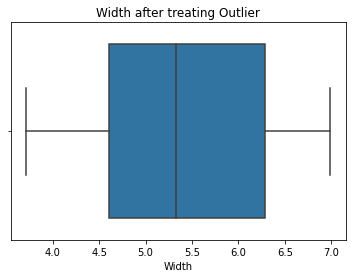

In [32]:
#Show outlier in Width column
sns.boxplot(df['Width']).set_title("Width after treating Outlier");

In [33]:
# This statement solved outlier problem in Length column
index = df[(df['Length'] >= 7) |(df['Length'] <= 4)].index
df.drop(index, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


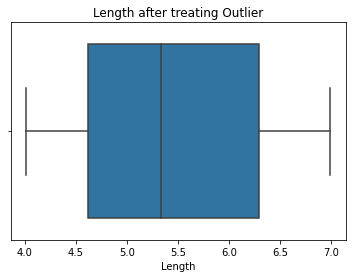

In [34]:
#Show outlier in Length column
sns.boxplot(df['Length']).set_title("Length after treating Outlier");

In [35]:
# This statement solved outlier problem in Carat column
index = df[(df['Carat'] >= 1.5)].index
df.drop(index, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


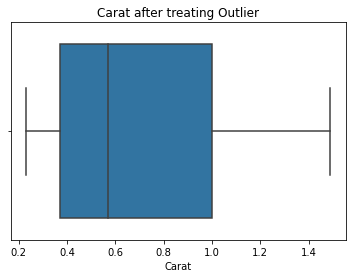

In [36]:
#Show outlier in Carat column
sns.boxplot(df['Carat']).set_title("Carat after treating Outlier");

In [37]:
# This statement solved outlier problem in Price column
index = df[(df['Price'] >= 6500)].index
df.drop(index, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


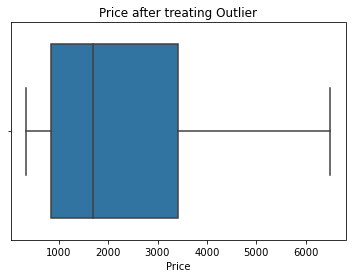

In [38]:
#Show outlier in Price column
sns.boxplot(df['Price']).set_title("Price after treating Outlier");

In [39]:
#This statement to show the correlation for dataframe
df.corr() 

,Carat,Length,Width,Height,Price
Carat,1.000000,0.988829,0.987039,0.987962,0.943428
Length,0.988829,1.000000,0.997645,0.987445,0.928034
Width,0.987039,0.997645,1.000000,0.986756,0.928687
Height,0.987962,0.987445,0.986756,1.000000,0.924585
Price,0.943428,0.928034,0.928687,0.924585,1.000000


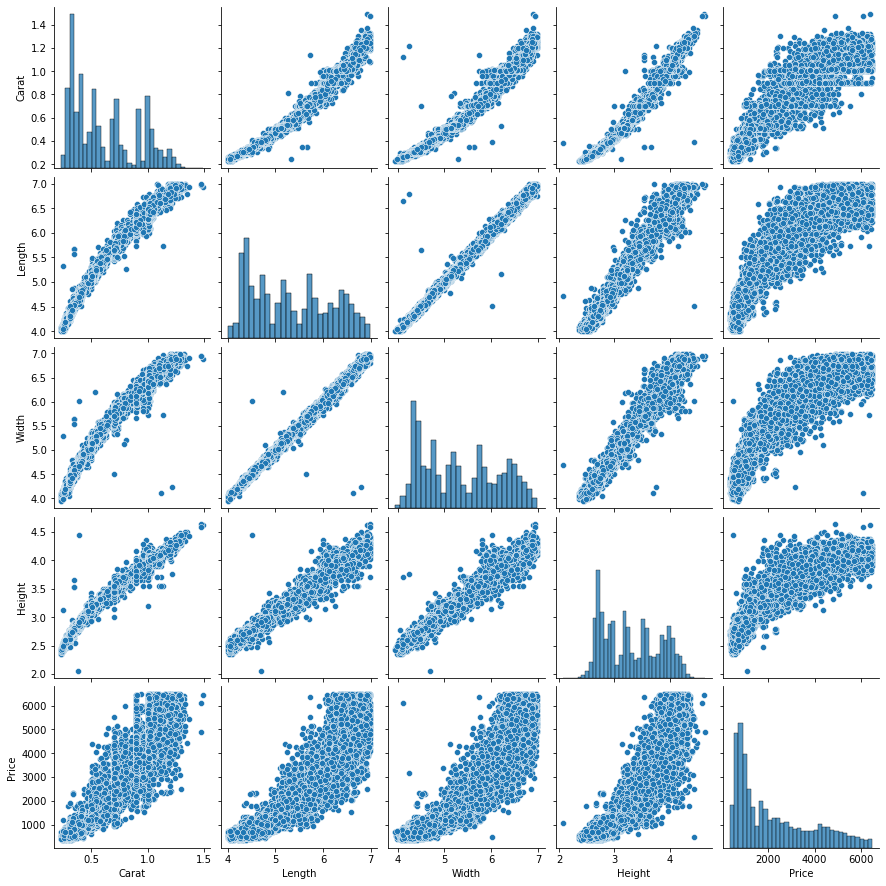

In [40]:
# Plot all of the variable-to-variable relations 
sns.pairplot(df);

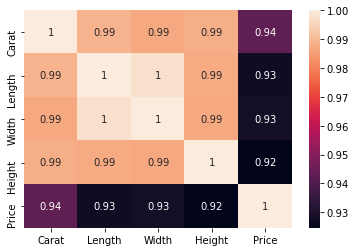

In [41]:
sns.heatmap(df.corr(),annot=True); #This statement to show the correlation for dataframe

## Solve the Questions:

## Q1:	What color is the best-selling stone ?

In [42]:
# show all color values and repetition
DF=df['Color'].value_counts()
DF

G    4343
E    4204
F    3795
H    3103
D    2901
I    1912
J     911
Name: Color, dtype: int64

In [43]:
# show all color values
DF=df["Color"].value_counts()
DF.index

Index(['G', 'E', 'F', 'H', 'D', 'I', 'J'], dtype='object')

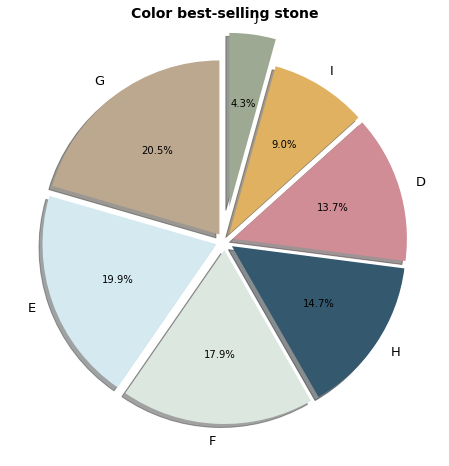

In [73]:
plt.figure(figsize=[8,8])#This statement for size of the plot 
plt.pie(df['Color'].value_counts(),# This statement for create a  plot 
labels=df['Color'].value_counts().index,
startangle=90,
colors=['#BCA88E', '#D4E9F0', '#DCE7E0', '#34586E', '#D18D96','#DFB160','#9DA993'],#This statement for plot color 
explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.2],
shadow=True, autopct='%1.1f%%');
plt.title("Color best-selling stone",fontsize =14,weight = 'bold');#This statement for write in Title 

## Q2:  What is the best-selling clarity stone?


In [62]:
# show all clarity values and repetition
DF=df['Clarity'].value_counts()
DF

SI1     5482
VS2     4736
SI2     3411
VS1     3082
VVS2    1913
VVS1    1545
IF       762
I1       238
Name: Clarity, dtype: int64

In [63]:
# show all clarity values
DF=df["Clarity"].value_counts()
DF.index

Index(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'], dtype='object')

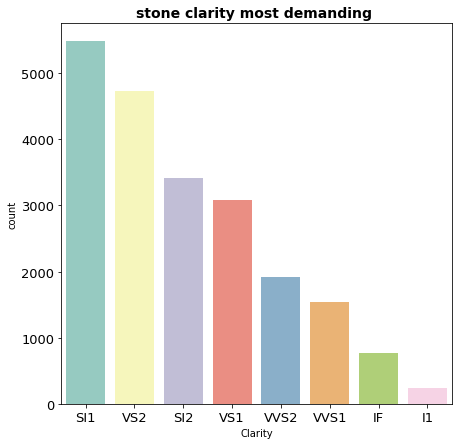

In [65]:
plt.figure(figsize=[7,7])#This statement for size of the plot 
sns.countplot(data= df ,x = "Clarity" , order = DF.index ,palette="Set3");# This statement for create a  plot 
plt.title('stone clarity most demanding ',fontsize = 14, weight = 'bold',color='black');#This statement for write in Title 

# Q3: Does the quality of the stone affect its price?


In [81]:
quality_stone=df.groupby("Cut")[["Price"]].sum().reset_index().sort_values("Price",ascending=False) #This statement for show affect quality on price
quality_stone

,Cut,Price
2,Ideal,17232123
3,Premium,12439307
4,Very Good,11055567
1,Good,5094428
0,Fair,1696302


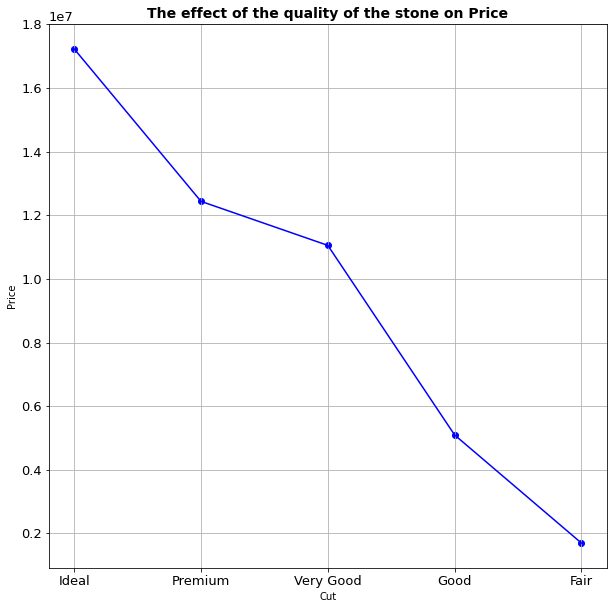

In [82]:
plt.figure(figsize = [10,10]) #This statement for size of the chart
sns.lineplot(data=quality_stone,x="Cut",y="Price",color="b") # This statement for create a chart and modify
plt.title("The effect of the quality of the stone on Price",fontsize =14, weight = 'bold'); #This statement for write in Title and modify
plt.grid() #This statement for drow on the chart by line
plt.scatter(quality_stone['Cut'],quality_stone['Price'],c='b' ); #This statement for create a chart and modify
plt.rc('xtick',labelsize=13) #This statement for size xticks
plt.rc('ytick',labelsize=13) #This statement for size yticks

## Q4: What is the maximum and minimum price of a stone based on its carat weight?

In [50]:
print("The largest weight of cubic zirconia is",df['Carat'].max())# show the maximum value in carat
print("its Price is estimated at",df['Price'].max())# show the maximum value in price
print("\n")
print("The smallest weight of cubic zirconia is",df['Carat'].min())# show the minimum value in carat
print("its Price is estimated at",df['Price'].min())# show the minimum value in carat

The largest weight of cubic zirconia is 1.49
its Price is estimated at 6499


The smallest weight of cubic zirconia is 0.23
its Price is estimated at 335


In [68]:
# show relationship of the weight of the stone with its price
DF=df.groupby("Carat",as_index=False)[["Price"]].mean()
DF

,Carat,Price
0,0.23,509.400000
1,0.24,519.340909
2,0.25,558.555556
3,0.26,548.704000
4,0.27,575.488000
...,...,...
110,1.33,5429.750000
111,1.35,4423.000000
112,1.37,5449.000000
113,1.47,5503.000000


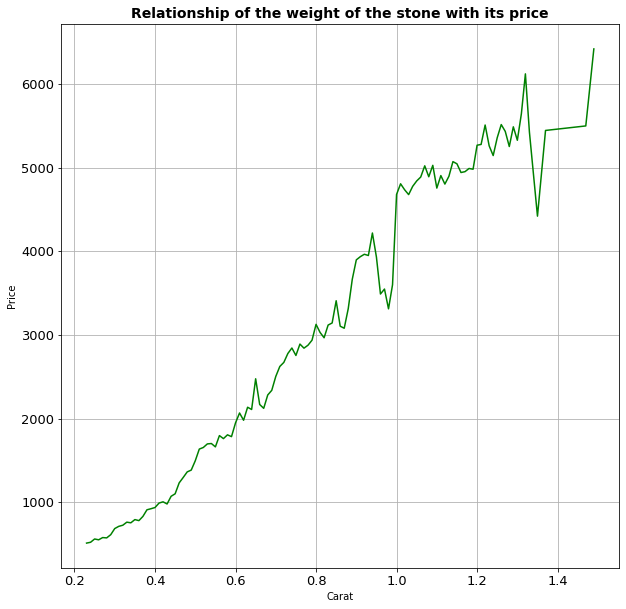

In [84]:
plt.figure(figsize = [10,10])#This statement for size of the plot
plt.title("Relationship of the weight of the stone with its price",fontsize =14 , weight = 'bold');#This statement for write in Title
sns.lineplot(data=DF,x='Carat',y='Price',color='g');# This statement for create a  plot 
plt.grid() # This statement to add grid lines to the plot